<a href="https://colab.research.google.com/github/Nikitaion/TensorFlowLearning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number!

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

## Creating some data to view and fit

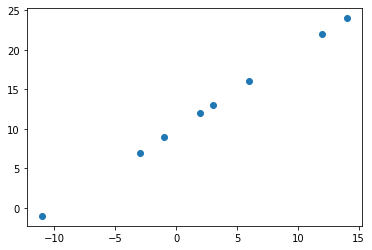

In [3]:
# Create feautures
# X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0, 18.0, 5.0, 123.0, 909.0, 523.0, 241.0, 233.0, 45.0, 64.0, 75.0, 453.0, 345.0, 654.0, 876.0])
X = np.array([-11.0, -3.0, -1.0, 2.0, 3.0, 6.0, 12.0, 14.0])

# Create labels
# y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0, 28.0, 15.0, 133.0, 919.0, 533.0, 251.0, 243.0, 55.0, 74.0, 85.0, 463.0, 355.0, 664.0, 886.0])
y = np.array([-1.0, 7.0, 9.0, 12.0, 13.0, 16.0, 22.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [4]:
# Create and demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0].ndim

0

In [7]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input/output layers, as well as the hidden layers of a deep learning model
2. **Compile a model** - define the loss function (the function which tells our model how wrong it is) and the optimiser (tells our model how improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns betveen X and y (features and labels)

In [9]:
# Set random seed
tf.random.set_seed(seed=42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1) # 1 - because we want input 1 number and predict 1 number
])

# 2. Compile the model  
model.compile(loss = tf.keras.losses.mae, # mae is short mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent (is an optimizer tells our neural network how it should improve)
              metrics=["mae"])
# loss - how wrong your model's predictions are compared to the truth labels (you want to minimise this)
# optimize - how your model should update its internal patterns to better predictions
# metrics - human interpretable values for how well your model is doing

# 3. Fit the model
# model.fit(X, y, epochs = 5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) #  model will have epochs = 5 opportunities of going through X and y

# epochs - how many times the model will go through all of the training examples

Epoch 1/5
1/1 [==============================] - 1s 692ms/step - loss: 11.1823 - mae: 11.1823
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.0967 - mae: 11.0967
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.0111 - mae: 11.0111
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9255 - mae: 10.9255
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.8398 - mae: 10.8398


In [10]:
X

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>

In [11]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-11.],
       [ -3.],
       [ -1.],
       [  2.],
       [  3.],
       [  6.],
       [ 12.],
       [ 14.]], dtype=float32)>

In [12]:
# InvalidArgumentError: Tried to expand dim index 2 for tensor with 1 dimensions. [Op:ExpandDims]
# tf.expand_dims(X, axis=2)

In [13]:
y

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>

In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using model
y_pred = model.predict([32.0])
y_pred

# Bad results

array([[22.691912]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function for perhaps the **learning rate** of the optimizatiion function
3. **Fitting a model**  - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model more examples to learn from)

In [16]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 269ms/step - loss: 10.9601 - mae: 10.9601
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8745 - mae: 10.8745
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.7888 - mae: 10.7888
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7032 - mae: 10.7032
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6176 - mae: 10.6176
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5320 - mae: 10.5320
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4463 - mae: 10.4463
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3607 - mae: 10.3607
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2751 - mae: 10.2751
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1895 - mae: 10.1895
Epoch 11/100
1/1 [==============================] - 0s 4m

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-11.,  -3.,  -1.,   2.,   3.,   6.,  12.,  14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-1.,  7.,  9., 12., 13., 16., 22., 24.], dtype=float32)>)

In [18]:
# Let's see if our model's prediction has improved
model.predict([12.0]), model.predict([10.0]), model.predict([-32.0]), model.predict([132.0])

(array([[20.68547]], dtype=float32),
 array([[17.383726]], dtype=float32),
 array([[-51.952923]], dtype=float32),
 array([[218.79018]], dtype=float32))

In [19]:
# Let's try to do better

# 1. Create the model (this time with extra layers)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model (this time with another optimizer with changed learning_rate)
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])
# Note: the learning rate is a most important hyper parameter of many different known networks.

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 385ms/step - loss: 11.5667 - mae: 11.5667
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5267 - mae: 8.5267
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 5.7317 - mae: 5.7317
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.5478 - mae: 6.5478
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 5.7208 - mae: 5.7208
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 4.5518 - mae: 4.5518
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 4.0236 - mae: 4.0236
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6773 - mae: 3.6773
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 3.5447 - mae: 3.5447
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 2.9753 - mae: 2.9753
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 2.

In [20]:
model.predict([12.0]), model.predict([10.0]), model.predict([-11.0]), model.predict([45.0])
#Thats better

(array([[20.848778]], dtype=float32),
 array([[19.065048]], dtype=float32),
 array([[-0.74188113]], dtype=float32),
 array([[50.852535]], dtype=float32))

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> 
evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation - there are 3 words you should memorize:

>"Visualise, visualise, visualise"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself. What does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of a model - how do the predictions of a modelline up against the ground truth (the original labels)

In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

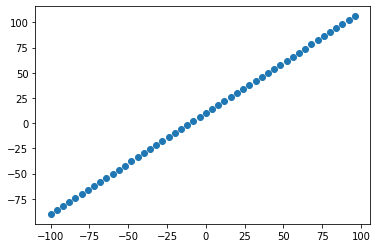

In [23]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets

* **Training set** - the model learns from this data. Typically 70-80 percent of the total avaliable data
* **Validation set** - the model gets tuned on this data. Typically 10-15 percent of the total avaliable data
* **Test set** - the model gets evaluated on this data to test what it has learned. Typically 10-15 percent of the total data available.

In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split the data into train and test set
X_train = X[:40] # First 40 training samples (80% data)
y_train = y[:40]

X_test = X[40:] # Last 10 samples (20% data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data 
Now we've got our data in training and test sets. Let's visualise it again

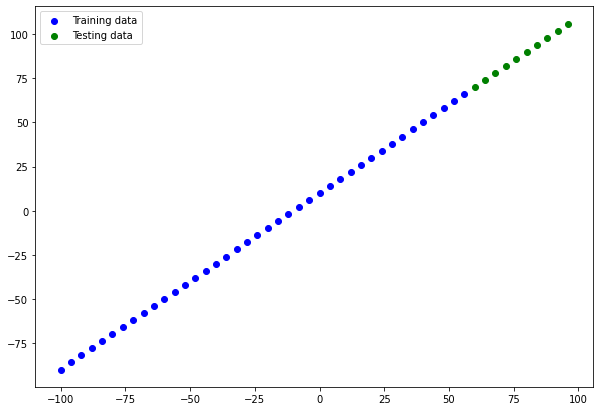

In [26]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [27]:
# Let's have a look at let's have a look at how to build a neural network for our data.

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [28]:
# let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model. Same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"), # input_shape=1 because we passing 1 number to predict 1 number
    tf.keras.layers.Dense(1, name="Output_layer")
], name="model_1")

# 2. Compile a model. Same as above
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

https://deeplizard.com/learn/video/8d-9SnGt5E0

In [30]:
# Let's fit a model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 for do it without many outputs

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


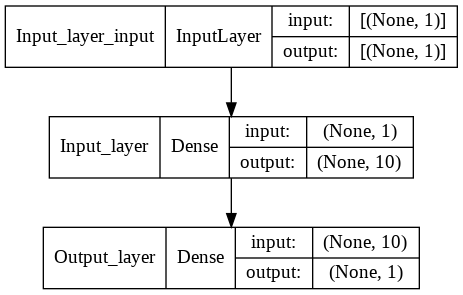

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).



In [33]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑**Note:** If you feel like You're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.



In [35]:
# Let's create a plotting func
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in a res
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legent
  plt.legend();

In [36]:
# plt.figure(figsize=(10, 7))
# # Plot training data in blue
# plt.scatter(X_test, y_pred, c="b", label="Predicted data")
# # Plot test data in green
# plt.scatter(X_test, y_test, c="g", label="Testing data")
# # Show a legend
# plt.legend()

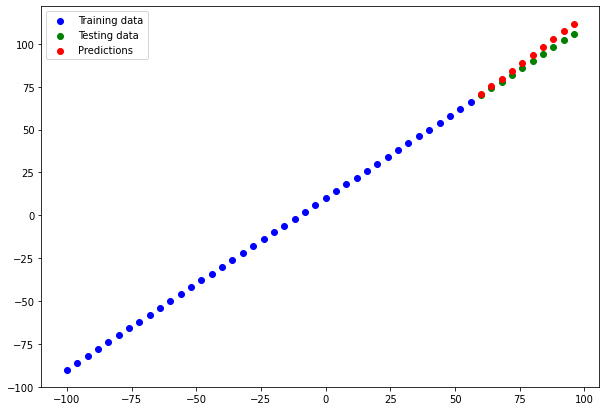

In [37]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)

In [38]:
# Let's try to do better
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    # tf.keras.layers.Dense(100, input_shape=[1], name="Input_layer"), # With 100 units worse
    # tf.keras.layers.Dense(10, input_shape=[1], name="Second_layer"), # With second layer - pretty worst
    tf.keras.layers.Dense(1, name="Output_layer")
], name="model_2")

model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.015), # With Adam lr=0.015 - better
              metrics=["mae"])


In [39]:
model_2.fit(X_train, y_train, epochs=100, verbose=0) # verbose=0 for do it without many outputs

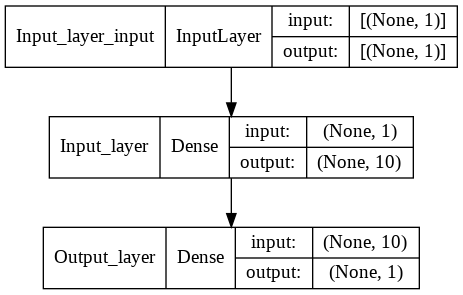

In [40]:
plot_model(model_2, show_shapes=True)

In [41]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

array([[ 69.35972 ],
       [ 73.320816],
       [ 77.281906],
       [ 81.24301 ],
       [ 85.2041  ],
       [ 89.16519 ],
       [ 93.12629 ],
       [ 97.087395],
       [101.04849 ],
       [105.009575]], dtype=float32)

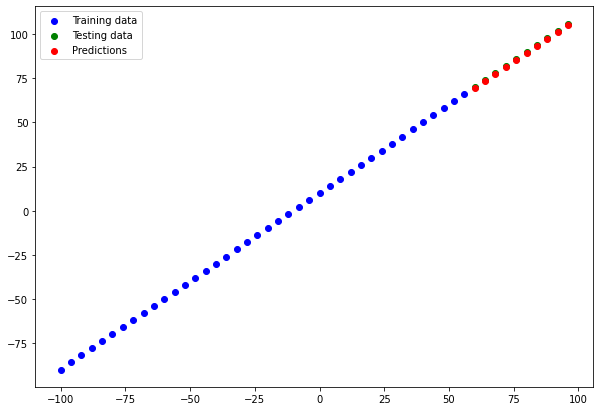

In [42]:
plot_predictions(predictions=y_pred_2)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions?". As a great starter metric for any regression problem 
( tf.keras.losses.MAE() & tf.metrics.mean_absolute_error() )
* MSE - mean squared error, "square the average errors". When larger errors are more significant than saller errors.
( tf.keras.losses.MSE() & tf.metrics.mean_squared_error() )
* Huber - Combination of MSE and MAE. Less sensitive to outliers than MSE
( tf.keras.losses.Huber() )

In [43]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [44]:
# Calculate the mean ablolute error
tf.keras.losses.MAE(y_true = y_test, y_pred=tf.squeeze(y_pred)) # We need to squeeze because y_pred have 1 extra dimension (shape=(10, 1))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [45]:
 tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [46]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
tf.constant(y_test)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [50]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [51]:
# Calculate the mean square error
tf.keras.losses.MSE(y_true = y_test, y_pred=tf.squeeze(y_pred)) # We need to squeeze because y_pred have 1 extra dimension (shape=(10, 1))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [52]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

In [53]:
mae

<function __main__.mae>

In [54]:
mse

<function __main__.mse>

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> 
evaluate it -> tweak again -> fit it -> evaluate it ...
```
1. Get more data - get more examples for your model to train on (more oportunities to learn patterns or relationships between feautures and labels)
2. Make your model larger (using a more complec model) - this might come in the form of mor layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modeling experiments:

1. 'model_1' - same os original model, 1 layer, trained 100 epochs
2. 'model_2' - 2 layers, trained 100 epochs
3. 'model_3' - 2 layers, trained 500 epochs
4. 
5. 

**Build model 1:**

In [55]:
# set random seed:
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# Compile the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

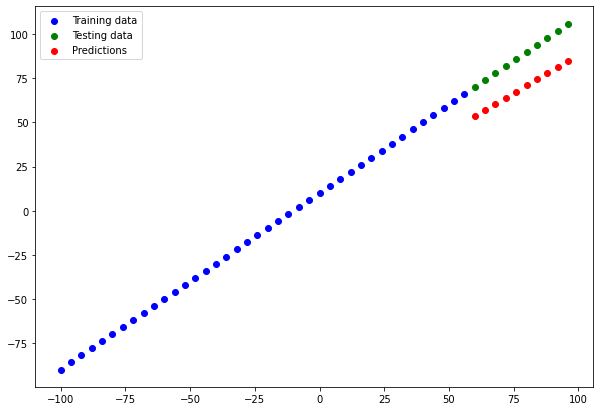

In [56]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [57]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [58]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

Build 'model_2' - 2 layers, trained 100 epochs

In [59]:
# set random seed:
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])
# Compile the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [==========================

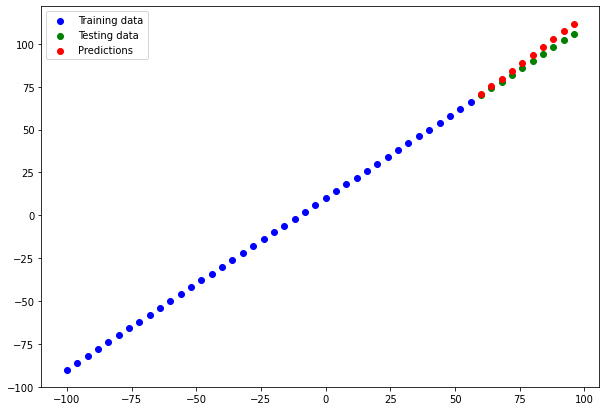

In [60]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [61]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

Build 'model_3' - 2 layers, trained 500 epochs

In [62]:
# set random seed:
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# Compile the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 9ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 3ms

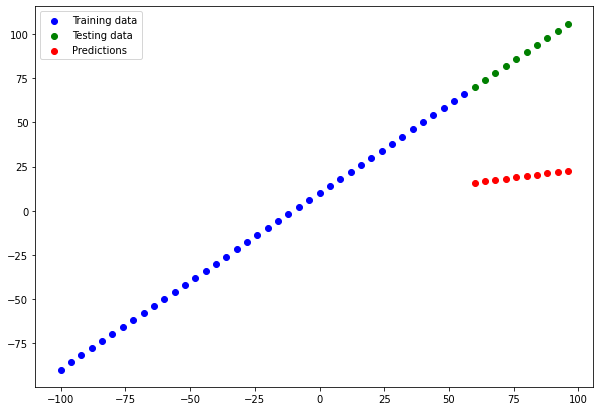

In [63]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [64]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiments

In [65]:
# Lets compare model results using pandas dataframe
import pandas as pd

model_results = [['model_1', mae_1, mae_2],
                 ['model_1', mae_2, mae_2],
                 ['model_1', mae_3, mae_3]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(3.1969407, shape=(), dtype=float32)"
1,model_1,"tf.Tensor(3.1969407, shape=(), dtype=float32)","tf.Tensor(3.1969407, shape=(), dtype=float32)"
2,model_1,"tf.Tensor(68.713615, shape=(), dtype=float32)","tf.Tensor(68.713615, shape=(), dtype=float32)"


In [66]:
model_results = [['model_1', mae_1.numpy(), mae_2.numpy()],
                 ['model_1', mae_2.numpy(), mae_2.numpy()],
                 ['model_1', mae_3.numpy(), mae_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,3.196941
1,model_1,3.196941,3.196941
2,model_1,68.713615,68.713615


In [67]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practicioner's motto: "experiment, experiment, experiment" 

 ## Tracking your experiments

 One really good habbit in machine learning modeling is to track the results of your experiments.

 And when doing so it can be tidious if your running lots of experiments 

 Luckly there are tools to help us

 📖 **Resourse** As your build more models, you'll want to look into using:
 * TensorBoard - a component of the TensorFlow library to help track modeling experiments
 * Weights & Biases - a tool to tracking all of kinds of machine learning experiments (plugs, straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google CoLab (or wherever they were trained, such as in a Web application or a mobile app)

There are two main formats we can save our models to:
1. The SavedModel format
2. The HDD5 format

In [68]:
# Save a model using the saved model format.
model_2.save("model_2_saved")

INFO:tensorflow:Assets written to: model_2_saved/assets


In [70]:
# Save model using HDF5 format
model_2.save("model_2_saved_HDF5.h5")

## Loading in a saved model

In [72]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/model_2_saved")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Download a model (or any other file) from Google Colab

1. Go to the files tab, right click on the file and "Download"
2.  Use code (as on cell bellow)
3. Save on Google Drive

In [76]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/model_2_saved_HDF5.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [78]:
# Read the nsurance ds
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object